In [1]:
import os
import numpy as np
import pylab
import healpy
import time

import minimask

In [2]:
poly = [[0,0],[10,0],[10,10],[0,10]]
M = minimask.vertices_to_mask([poly], weights=[1], pixel_mask_nside=64)
print M.config

{'pixel_mask_nside': 64, 'pixel_mask_order': 'ring'}


In [3]:
cap1 = minimask.spherical_polygon(caps=[[(4,5), 2]], lonlat=True)
cap2 = minimask.spherical_polygon(caps=[[(6,5), 2]], lonlat=True)
cap3 = minimask.spherical_polygon(caps=[[(5,4), 2]], lonlat=True)
cap4 = minimask.spherical_polygon(caps=[[(5,6), 2]], lonlat=True)

circles = minimask.Mask([cap1, cap2, cap3, cap4], weights=[1, 1, 1, 1])

M.append(circles)

pixelization time 8.15278911591
80.7015521389 99.2984478611 -9.29844786115 9.29844786115
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


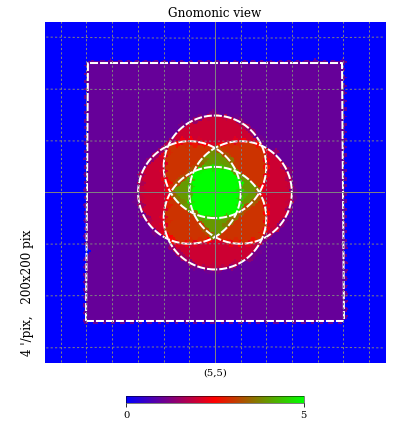

In [4]:
t0 = time.time()
map = M.pixelize(n=10, nside=256, order='nest', weight=True, operation='sum')
print "pixelization time",time.time()-t0

healpy.gnomview(map, rot=(5,5,0),reso=4,cmap='brg',nest=True)
for x,y in M.render(1):
    healpy.projplot(x,y,lonlat=True,c='w', lw=2, dashes=[4,1])
healpy.graticule(color='grey')
pylab.show()